### Perform k-means clustering of the anndata object

Splitting this up into a separate notebook since it takes longer to run compared to other downstream analysis

In [1]:
import numpy as np
import random
import anndata as ad
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(0)
np.random.seed(0)

In [2]:
# load the anndata file with the SIFT descriptors
filename = '/gladstone/engelhardt/lab/adamw/saft_figuren/analysis/adata_20250225.h5ad'
adata = ad.read_h5ad(filename)
adata

/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 3389740 × 128
    obs: 'donor_id', 'time', 'well_id', 'rasa2ko_titration', 'et_ratio', 'entropy', 'p_areas', 'filename', 'scales', 'octaves', 'sigmas', 'orientations', 'x', 'y', 'n_og_keypoints'
    obsm: 'X_pca'

### Perform K-means clustering of the entire dataset

Test with `k=3`, `k=4`, ..., `k=8`. Select the optimal number of clusters by saving the WCCS and silhouette scores for each `k`.

In [3]:
# k-means clustering of SIFT descriptors
k_values = np.arange(3, 11)

for k in k_values:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(adata.X)
    adata.obs['kmeans_{}'.format(k)] = kmeans.labels_
    adata.obs['kmeans_{}'.format(k)] = adata.obs['kmeans_{}'.format(k)].astype('category')
    # add the k-means inertia (WCCS) score and silhouette score as adata.uns object under the key 'kmeans_{}'.format(k)
    adata.uns['kmeans_{}'.format(k)] = {'wccs': kmeans.inertia_}

adata

3


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10


/gladstone/engelhardt/home/adamw/miniforge3/envs/saft/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AnnData object with n_obs × n_vars = 3389740 × 128
    obs: 'donor_id', 'time', 'well_id', 'rasa2ko_titration', 'et_ratio', 'entropy', 'p_areas', 'filename', 'scales', 'octaves', 'sigmas', 'orientations', 'x', 'y', 'n_og_keypoints', 'kmeans_3', 'kmeans_4', 'kmeans_5', 'kmeans_6', 'kmeans_7', 'kmeans_8', 'kmeans_9', 'kmeans_10'
    uns: 'kmeans_3', 'kmeans_4', 'kmeans_5', 'kmeans_6', 'kmeans_7', 'kmeans_8', 'kmeans_9', 'kmeans_10'
    obsm: 'X_pca'

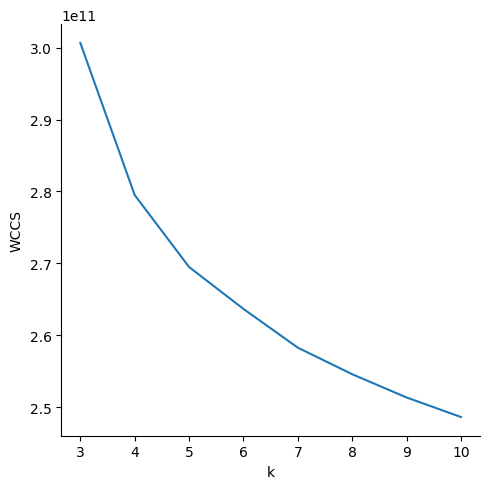

In [4]:
# plot the k-means clustering WCCS scores as a function of the number of clusters (k)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)
wccs_scores = [adata.uns['kmeans_{}'.format(k)]['wccs'] for k in k_values]
ax.plot(k_values, wccs_scores)
ax.set_xlabel('k')
ax.set_ylabel('WCCS')
sns.despine(ax=ax)
plt.show()

In [5]:
# save the anndata file with the k-means clustering results
filename = filename.replace('.h5ad', '_kmeans.h5ad')
adata.write(filename)